COMPUTING PROJECT                                                                       

MAHASHRUTHI (1932022) & RITIKA(1932039)

# SCHOOLS STATUS IN INDIA 

Most Recent data is of 2016-17.So we have made an analysis based on information obtained from this year.
Comparisons are also made with respect to the year 2005-06.

PROBLEM STATEMENT

In India, even though government schools outnumber private institutions, they have been grossly inadequate in meeting the needs and aspirations of the people. 
Due to inferior infrastructure, government schools are unable to provide an atmosphere of competition. As a result, the students never have the advantage of practicing what they study in their schools.


### MODULES  


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
from scipy import stats
from statsmodels.stats import weightstats as stests


### IMPORTING CSV FILES

Two excel files one of 2016-17 and other of 2005-06 are imported, after processing required data and converting into csv files.

In [89]:
df1 = pd.read_csv (r'C:\Users\ritik\OneDrive\Desktop\COMPUTING\2005-06.csv')
df2 = pd.read_csv (r'C:\Users\ritik\OneDrive\Desktop\COMPUTING\2016-17.csv')

REMOVING ERROR IN DATASET
ValueError: array must not contain infs or NaNs

In [90]:
nan_df1 = df1[df1.isna().any(axis=1)]
nan_df1.head()
df1 = df1.dropna()

In [91]:
nan_df2 = df2[df2.isna().any(axis=1)]
nan_df2.head()
df2 = df2.dropna()

In [93]:
nan_df1.head() #2005-06

,AC_YEAR,STATE,DISTRICT,SCHOOLS,DRINKING FACILITY,SINGLE TEACHER SCHOOL,TOTAL CLASSROOM,SCHOOLS WITH PTR>100,SC ENROLMENT PRIMARY,SC ENROLMENT UPPER PRIMARY,ST ENROLMENT PRIMARY,ST ENROLMENT UPPER PRIMARY,LITERACY RATE,FEMALE LITERACIY,Population,Primaryy


In [95]:
nan_df2.head() #2016-17

,AC_YEAR,STATE,DISTRICT,SCHOOLS,BOYS ONLY,GIRLS ONLY,PLAYGROUND,DRINKING WATER,ELECTRICITY,COMPUTER,...,TOTAL ENROLMENT,PRIVATE ENROLMENT,% PRIVATE ENROLMENT,Primary with upper Primary Sec/H.Sec.2,Upper Primary Only.2,Upper Primary with Sec./H.Sec.2,Primary with upper Primary Sec.2,Upper Primary with Sec..2,TOTAL SECONDARY,% TOTAL SECONDARY
54,2016-17,PUNJAB,Fazilka,1059,1050,1056,1037,1059,1059,526,...,153875,60293,39.183103,4400,8256,16713,2316,10106,41791,27.159058
55,2016-17,PUNJAB,PATHANKOT,801,795,798,778,801,799,389,...,88542,46886,52.953401,10480,4012,6355,379,3787,25013,28.249870
165,2016-17,UTTAR PRADESH,KANPUR DEHAT,2861,2840,2848,1972,2856,881,242,...,218860,78476,35.856712,0,33806,137,0,0,33943,15.509001
200,2016-17,UTTAR PRADESH,SAMBHAL (BHIM NAGAR),2371,2328,2361,1560,2370,874,247,...,367390,154046,41.929829,916,43841,418,0,0,45175,12.296197
205,2016-17,UTTAR PRADESH,AMETHI - CSM NAGAR,2519,2482,2517,1096,2494,741,220,...,273209,116464,42.628171,589,33012,1998,0,0,35599,13.029951


## TOTAL SCHOOLS as of 2016-2017

OF ALL STATES AND UNION TERRITORIES

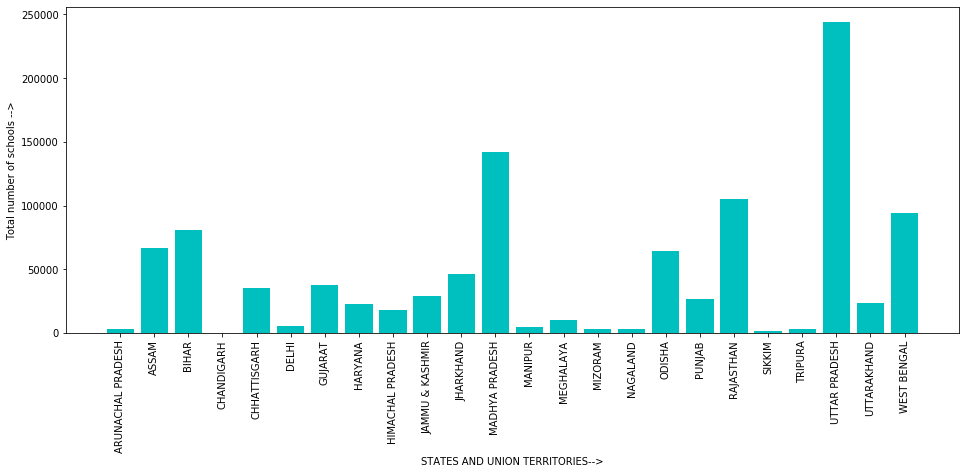

In [97]:
result2 = df2.groupby('STATE').sum()
plt.figure(figsize=(16,6))
schools=[state for state, df2 in df2.groupby('STATE')]
plt.bar(schools,result2['SCHOOLS'],color='c')
plt.xticks(rotation=90)   
plt.ylabel('Total number of schools -->')
plt.xlabel('STATES AND UNION TERRITORIES-->')
plt.show()

### BOYS ONLY VS GIRLS ONLY

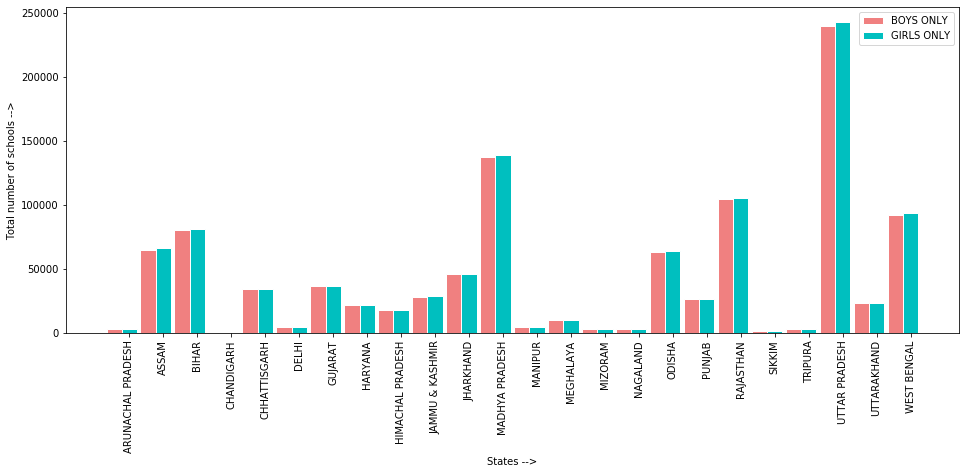

In [100]:
result2 = df2.groupby('STATE').sum()
schools=[state for state, df2 in df2.groupby('STATE')]
plt.figure(figsize=(16,6))
barWidth = 0.45
bars1 = result2['BOYS ONLY']
bars2 = result2['GIRLS ONLY']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='lightcoral', width=barWidth, edgecolor='white', label='BOYS ONLY')
plt.bar(r2, bars2, color='c', width=barWidth, edgecolor='white', label='GIRLS ONLY')
plt.xticks([r + barWidth for r in range(len(bars1))],schools,rotation=90)
plt.ylabel('Total number of schools -->')
plt.xlabel('States -->')
plt.legend()
plt.show()


## COMPARISON OF TOTAL SCHOOLS 2005-06 VS 2016-17

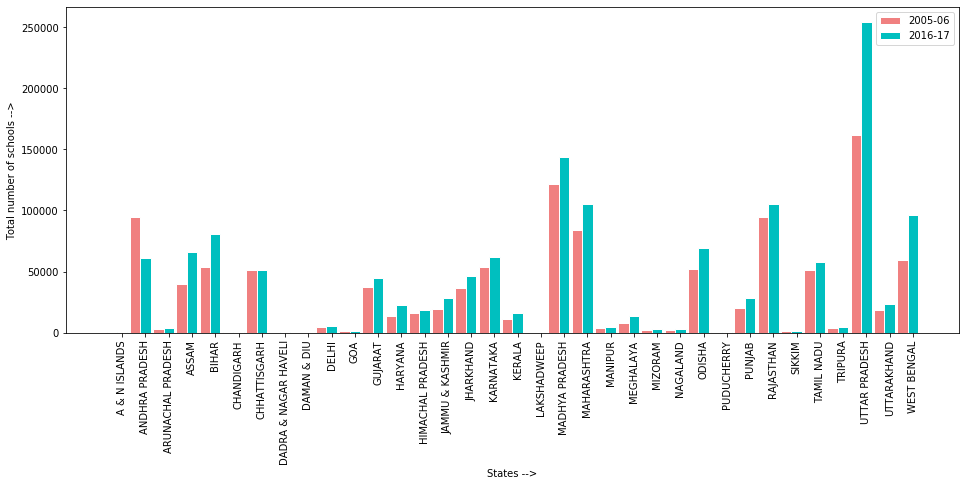

In [133]:
result1 = df1.groupby('STATE').sum()
result2 = df2.groupby('STATE').sum()
schools=[state for state, df1 in df1.groupby('STATE')]


import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
barWidth = 0.45
bars1 = result1['SCHOOLS']
bars2 = result2['SCHOOLS']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars2, color='lightcoral', width=barWidth, edgecolor='white', label='2005-06')
plt.bar(r2, bars1, color='c', width=barWidth, edgecolor='white', label='2016-17')
plt.xticks([r + barWidth for r in range(len(bars1))],schools,rotation=90)
plt.ylabel('Total number of schools -->')
plt.xlabel('States -->')
plt.legend()
plt.show()


##  FACILITIES IN SCHOOLS AS OF 2016-17

   #### ALL SCHOOLS WITH PLAYGROUND 

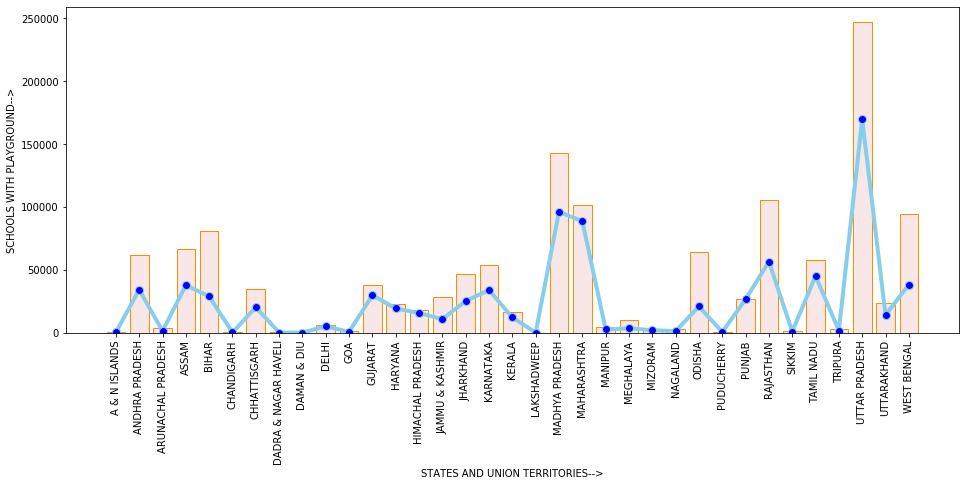

In [32]:
plt.figure(figsize=(16,6))
schools=[state for state, df2 in df2.groupby('STATE')]
plt.bar(schools,result2['SCHOOLS'],color=(0.8, 0.1, 0.1, 0.1),  edgecolor='darkorange')
plt.plot(schools,result2['PLAYGROUND'], marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.xticks(rotation=90)   
plt.ylabel('SCHOOLS WITH PLAYGROUND-->')
plt.xlabel('STATES AND UNION TERRITORIES-->')
plt.show()

#### ALL SCHOOLS WITH ELECTRICITY 

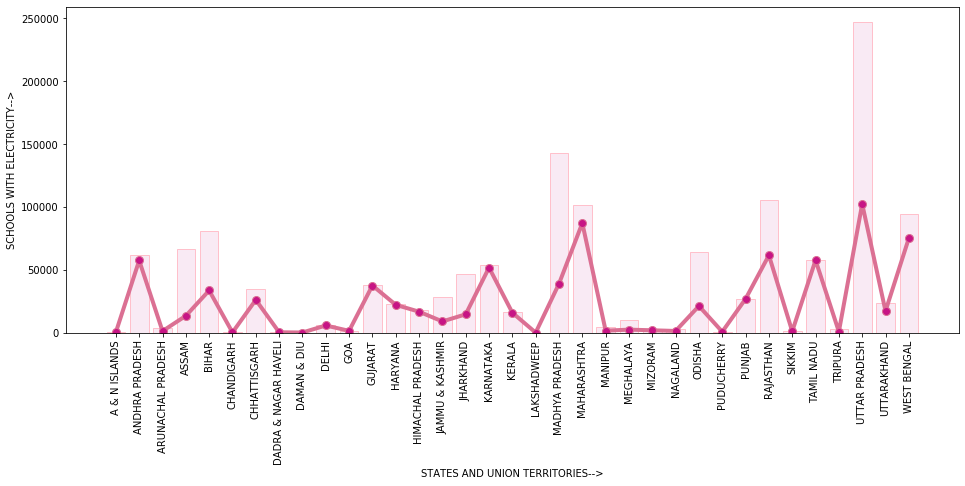

In [31]:
plt.figure(figsize=(16,6))
schools=[state for state, df2 in df2.groupby('STATE')]
plt.bar(schools,result2['SCHOOLS'],color=(0.8, 0.2, 0.6, 0.1),  edgecolor='pink')
plt.plot(schools,result2['ELECTRICITY'], marker='o', markerfacecolor='mediumvioletred', markersize=8, color='palevioletred', linewidth=4)
plt.xticks(rotation=90)   
plt.ylabel('SCHOOLS WITH ELECTRICITY-->')
plt.xlabel('STATES AND UNION TERRITORIES-->')
plt.show()

#### ALL SCHOOLS WITH DRINKING WATER 

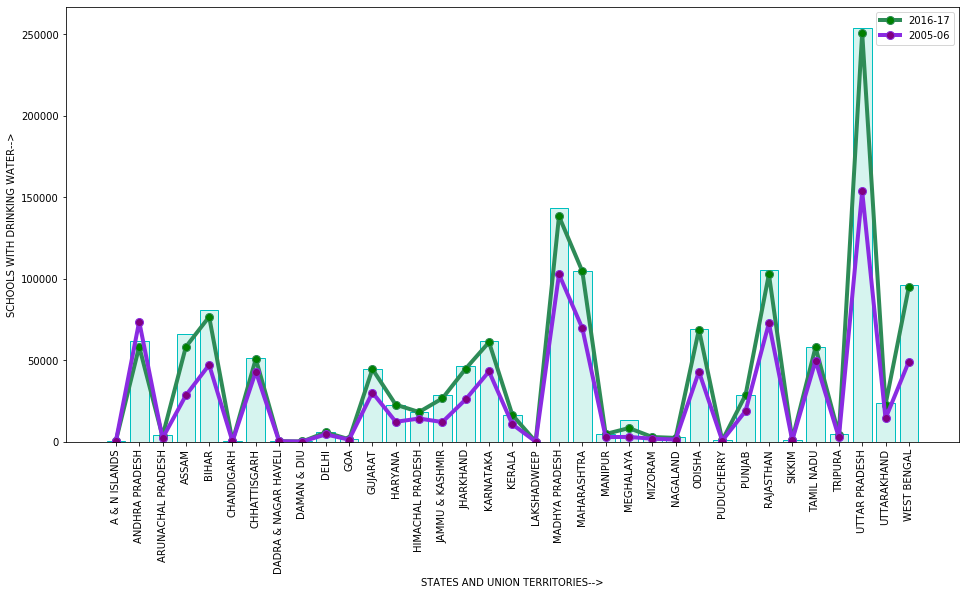

In [123]:
import pandas as pd
df1 = pd.read_csv (r'C:\Users\ritik\OneDrive\Desktop\COMPUTING\2016-17.csv')
df2 = pd.read_csv (r'C:\Users\ritik\OneDrive\Desktop\COMPUTING\2005-06.csv')
result1 = df1.groupby('STATE').sum()
result2 = df2.groupby('STATE').sum()
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
schools=[state for state, df1 in df1.groupby('STATE')]
plt.bar(schools,result1['SCHOOLS'],color=(0.2, 0.8, 0.7, 0.2),  edgecolor='c')
plt.plot(schools,result1['DRINKING WATER'], marker='o', markerfacecolor='green', markersize=8, color='seagreen', linewidth=4,label='2016-17')
plt.plot(schools,result2['DRINKING FACILITY'], marker='o', markerfacecolor='purple', markersize=8, color='blueviolet', linewidth=4,label='2005-06')
plt.xticks(rotation=90)   
plt.ylabel('SCHOOLS WITH DRINKING WATER-->')
plt.xlabel('STATES AND UNION TERRITORIES-->')
plt.legend()
plt.show()

### ALL SCHOOLS WITH COMPUTER 

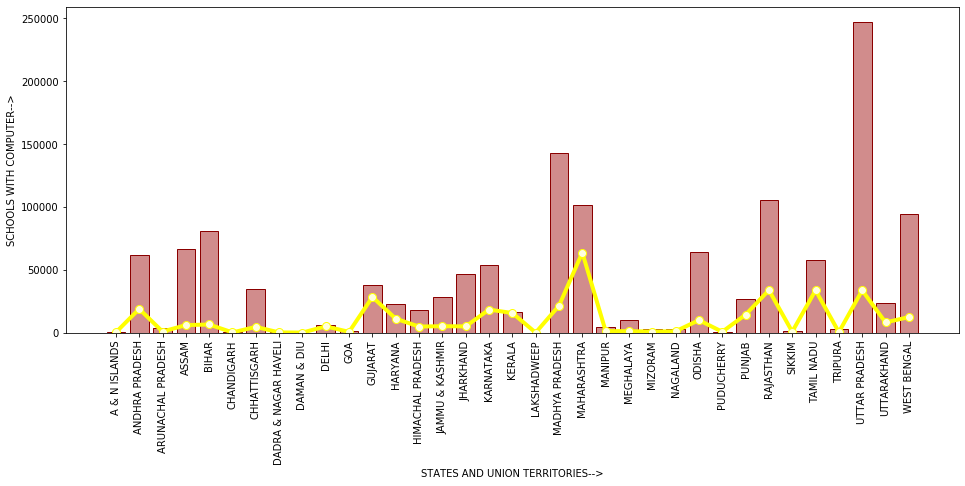

In [26]:
plt.figure(figsize=(16,6))
schools=[state for state, df2 in df2.groupby('STATE')]
plt.bar(schools,result2['SCHOOLS'],color=(0.8, 0.5, 0.5, 0.9),  edgecolor='darkred')
plt.plot(schools,result2['COMPUTER'], marker='o', markerfacecolor='lightyellow', markersize=8, color='yellow', linewidth=4)
plt.xticks(rotation=90)   
plt.ylabel('SCHOOLS WITH COMPUTER-->')
plt.xlabel('STATES AND UNION TERRITORIES-->')
plt.show()

#### GOVERNMENT AND AIDED SCHOOLS PROVIDING MID-DAY MEAL

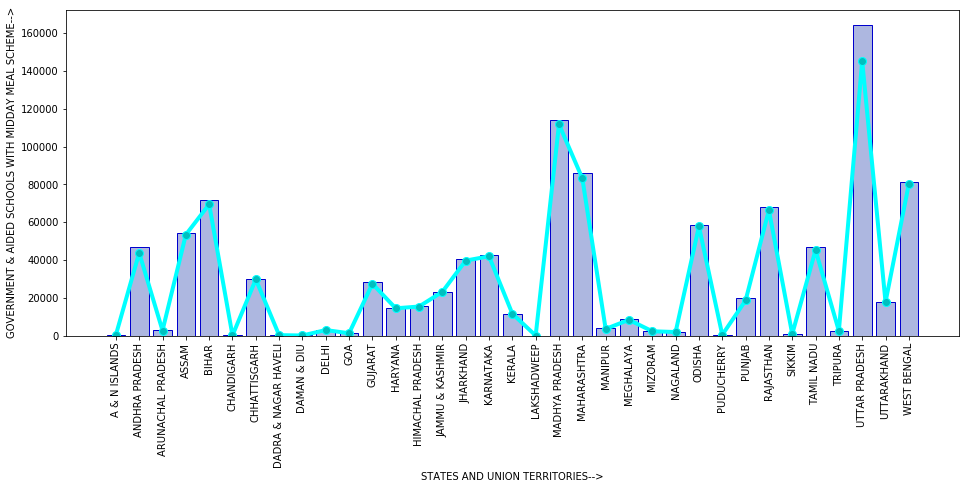

In [27]:
plt.figure(figsize=(16,6))
schools=[state for state, df2 in df2.groupby('STATE')]
plt.bar(schools,result2['GOVERNMENT SCHOOLS'],color=(0.2, 0.3, 0.7, 0.4),  edgecolor='mediumblue')
plt.plot(schools,result2['MIDDAY MEAL'], marker='o', markerfacecolor='c', markersize=8, color='cyan', linewidth=4)
plt.xticks(rotation=90)   
plt.ylabel('GOVERNMENT & AIDED SCHOOLS WITH MIDDAY MEAL SCHEME-->')
plt.xlabel('STATES AND UNION TERRITORIES-->')
plt.show()

## SCHOOLS VS CLASSROOMS 

#### CORRELATION GRAPH

##### 2016-17 

Text(0.5, 0, 'CLASSROOMS -->')

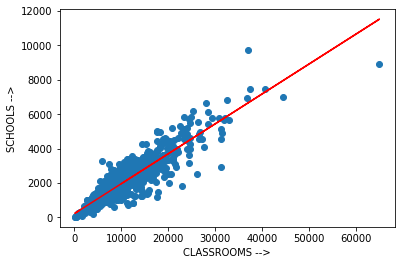

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x=df2['CLASSROOMS'], y=df2["SCHOOLS"])
m, b = np.polyfit(df2['CLASSROOMS'],df2["SCHOOLS"], 1)
plt.plot(df2['CLASSROOMS'], m*df2['CLASSROOMS'] + b,'red', label='Data points')
plt.ylabel('SCHOOLS -->')
plt.xlabel('CLASSROOMS -->')

#### Karl Pearson's Coefficient of Correlation of SCHOOLS vs CLASSROOMS

In [37]:
import scipy.stats
x=df2['CLASSROOMS']
y=df2["SCHOOLS"]
r, p = scipy.stats.pearsonr(x, y)
print('PEARSON''S CORRELATION COEFFICIENT FOR SCHOOLS VS CLASSROOMS 2016-17:\t',r)

PEARSONS CORRELATION COEFFICIENT FOR SCHOOLS VS CLASSROOMS 2016-17:	 0.9029839078052034


##### 2005-06 

Text(0.5, 0, 'CLASSROOMS -->')

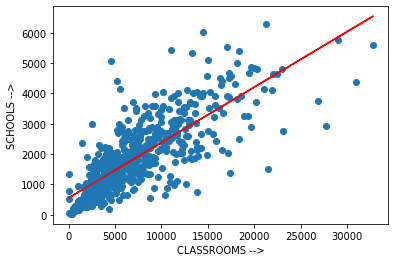

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x=df1['TOTAL CLASSROOM'], y=df1["SCHOOLS"])
m, b = np.polyfit(df1['TOTAL CLASSROOM'],df1["SCHOOLS"], 1)
plt.plot(df1['TOTAL CLASSROOM'], m*df1['TOTAL CLASSROOM'] + b,'red', label='Data points')
plt.ylabel('SCHOOLS -->')
plt.xlabel('CLASSROOMS -->')

#### Karl Pearson's Coefficient of Correlation of SCHOOLS vs CLASSROOMS

In [39]:
import scipy.stats
x=df1['TOTAL CLASSROOM']
y=df1["SCHOOLS"]
r, p = scipy.stats.pearsonr(x, y)
print('PEARSON''S CORRELATION COEFFICIENT FOR SCHOOLS VS CLASSROOMS 2005-06:\t',r)

PEARSONS CORRELATION COEFFICIENT FOR SCHOOLS VS CLASSROOMS 2005-06:	 0.7900315365212037


As we can see the correlation coefficient value is 0.9029839078052034 in 2016-17 and 0.9029839078052034 in 2005-06.
Thus, we can see that the relation has grown over the years and will continue to do so in future as well.

## SCHOOLS VS AREA OF DISTRICTS IN sq km

#### REGRESSION

Text(0.5, 0, 'AREA_SQKM -->')

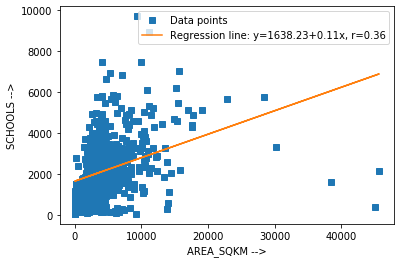

In [42]:
import matplotlib.pyplot as plt
fig, plt = plt.subplots()
x=df2['AREA_SQKM']
y=df2["SCHOOLS"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
plt.plot(x, y, linewidth=0, marker='s', label='Data points')
plt.plot(x, intercept + slope * x, label=line)
plt.legend(facecolor='white')
plt.set_ylabel('SCHOOLS -->')
plt.set_xlabel('AREA_SQKM -->')

According to the results obtain from the regression graph of AREA of districts vs SCHOOLS, they are dependant to each other by a positive factor of 0.36.
This indicates that as the value of the independent variable (AREA) increases, the value of the dependent variable (SCHOOLS) also tends to increase.
This tends to be less due to many factors like - uneven population in different districts etc.


### LITERACY RATE

### 2016-2017

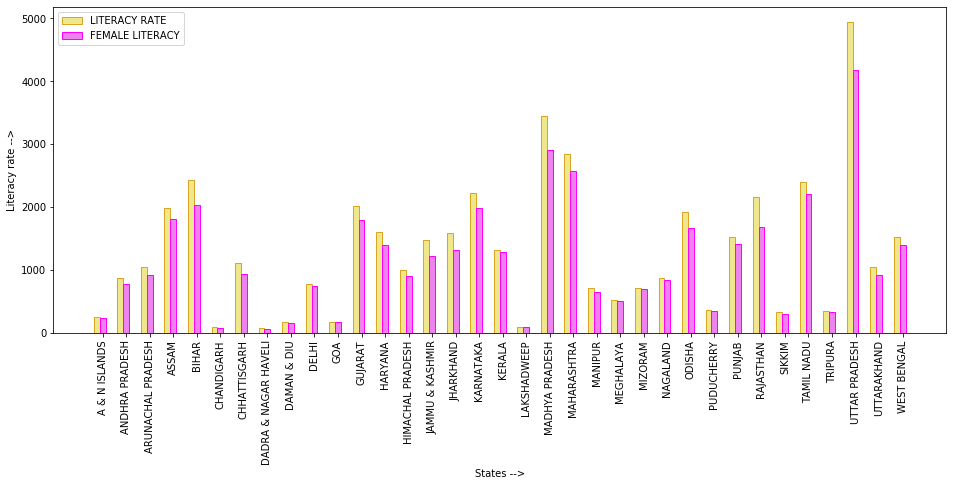

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
barWidth = 0.25
schools=[state for state, df2 in df2.groupby('STATE')]
bars1 = result2['OVERALL LITERACY']
bars2 = result2['FEMALE LITERACY']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='khaki', width=barWidth, edgecolor='goldenrod', label='LITERACY RATE')
plt.bar(r2, bars2, color='violet', width=barWidth, edgecolor='fuchsia', label='FEMALE LITERACY')
plt.xticks([r + barWidth for r in range(len(bars1))],schools,rotation=90) 
plt.ylabel('Literacy rate -->')
plt.xlabel('States -->')
plt.legend()
plt.show()

### 2016-2017 vs 2005-2006

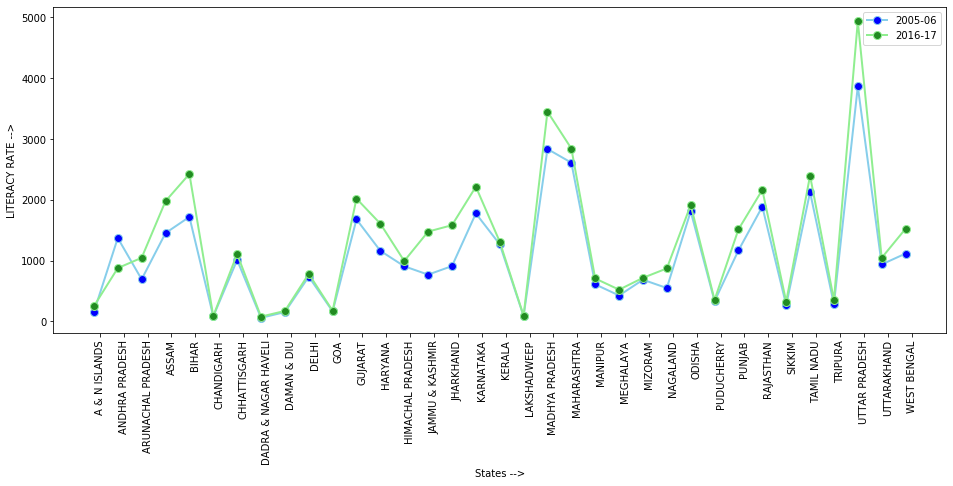

In [45]:
plt.figure(figsize=(16,6))
barWidth = 0.25
bars1 = result1['LITERACY RATE']
bars2 = result2['OVERALL LITERACY']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.plot(schools,bars1, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2,label='2005-06')
plt.plot(schools,bars2, marker='o', markerfacecolor='forestgreen', markersize=8, color='lightgreen', linewidth=2,label='2016-17')
plt.xticks([r + barWidth for r in range(len(bars1))],schools,rotation=90)
plt.ylabel('LITERACY RATE -->')
plt.xlabel('States -->')
plt.legend()
plt.show()

Clearly there has been an increase in the literate population between both the years in some states as we can observe, but sadly there has been no signifacant increase in few others.
The country to become developed must definitely aim towards 100% literacy rate for both overall and female rates.
Achieving higher female literacy is important for the development as well.


### SINGLE TEACHER SCHOOLS

### 2016-2017 vs 2005-2006

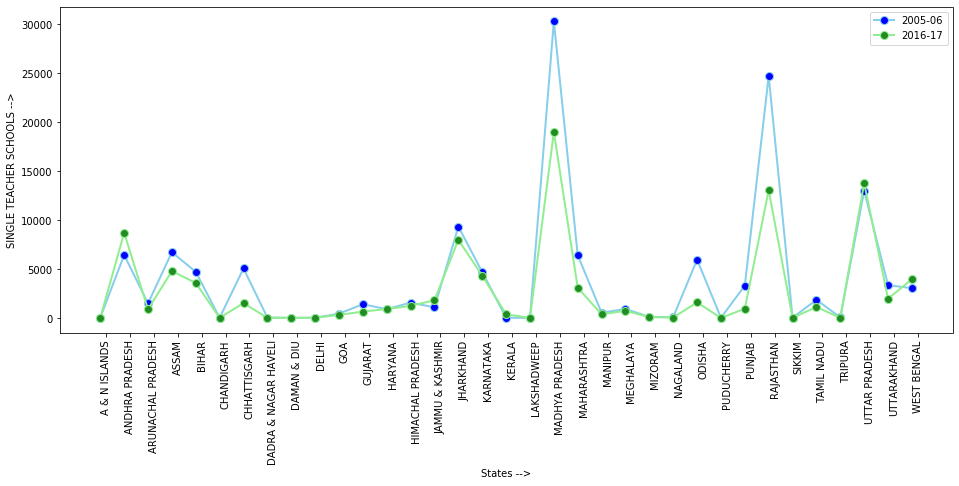

In [46]:
plt.figure(figsize=(16,6))
barWidth = 0.25
bars1 = result1['SINGLE TEACHER SCHOOL']
bars2 = result2['SINGLE TEACHER SCHOOLS']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.plot(schools,bars1, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2,label='2005-06')
plt.plot(schools,bars2, marker='o', markerfacecolor='forestgreen', markersize=8, color='lightgreen', linewidth=2,label='2016-17')
plt.xticks([r + barWidth for r in range(len(bars1))],schools,rotation=90)
plt.ylabel('SINGLE TEACHER SCHOOLS -->')
plt.xlabel('States -->')
plt.legend()
plt.show()

As observable clearly there has been a steady reduction in single teacher schools in most states. Hence, the value of education received is improving in our country with decrease in single teacher schools.

### PUPIL TEACHER RATIO - PTR

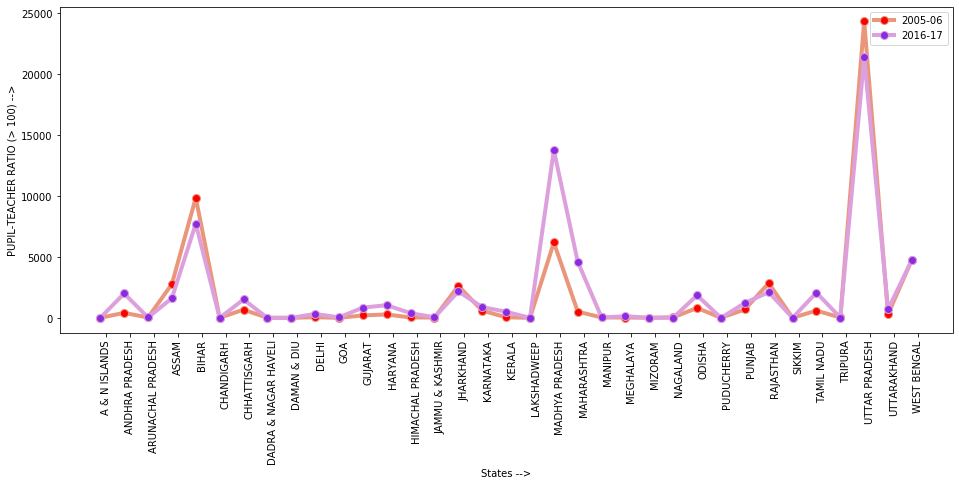

In [47]:
plt.figure(figsize=(16,6))
barWidth = 0.25
bars1 = result1['SCHOOLS WITH PTR>100']
bars2 = result2['PTR']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.plot(schools,bars1, marker='o', markerfacecolor='red', markersize=8, color='darksalmon', linewidth=4,label='2005-06')
plt.plot(schools,bars2, marker='o', markerfacecolor='blueviolet', markersize=8, color='plum', linewidth=4,label='2016-17')
plt.xticks([r + barWidth for r in range(len(bars1))],schools,rotation=90)
plt.ylabel('PUPIL-TEACHER RATIO (> 100) -->')
plt.xlabel('States -->')
plt.legend()
plt.show()


SCHOOLS WITH PUPIL TEACHER RATIO GREATER THAN 100 ARE DISPLAYED IN THIS GRAPH, WITH INCREASING POPULATION,JOB DEMANDS AND STUDENT ENROLMENT, THE RATIO HAS INCREASED LESS OVER THE YEARS IN SOME PLACES EXCLUDING DENSELY POPULATED STATES.

## ST ENROLMENT - PRIMARY & UPPER PRIMARY

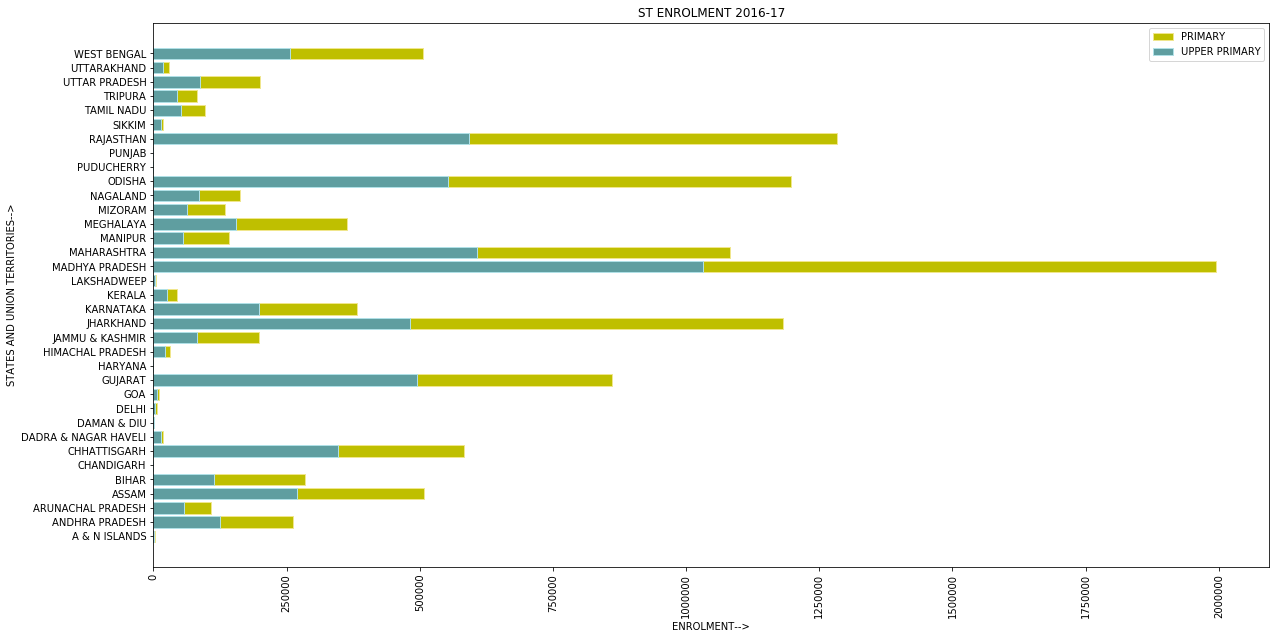

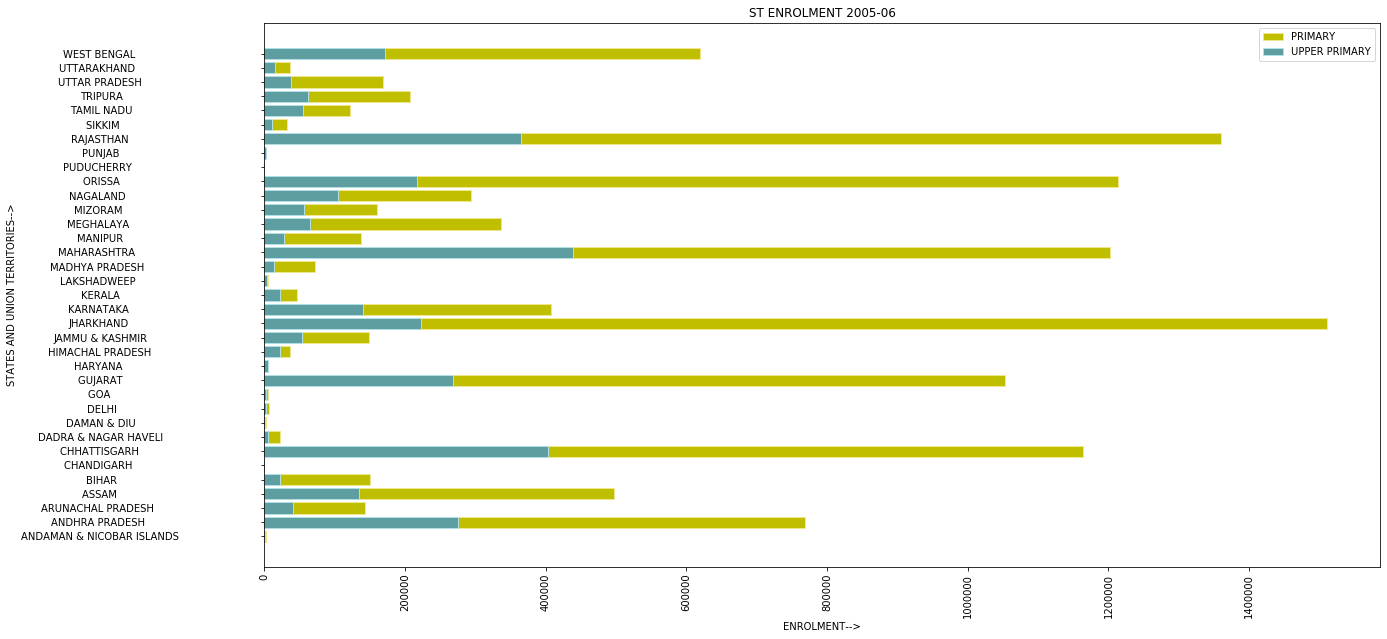

In [48]:
plt.figure(figsize=(20,10))
schools=[state for state, df2 in df2.groupby('STATE')]
plt.barh(schools,result2['ST ENROLMENT- PRIMARY'],color='y',  edgecolor='khaki',label='PRIMARY')
plt.barh(schools,result2['ST ENROLMENT- UPPER PRIMARY'],color='cadetblue',  edgecolor='powderblue',label='UPPER PRIMARY')
plt.xticks(rotation=90)   
plt.title("ST ENROLMENT 2016-17")
plt.xlabel('ENROLMENT-->')
plt.ylabel('STATES AND UNION TERRITORIES-->')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
schools=[state for state, df1 in df1.groupby('STATE')]
plt.barh(schools,result1['ST ENROLMENT PRIMARY'],color='y',  edgecolor='khaki',label='PRIMARY')
plt.barh(schools,result1['ST ENROLMENT UPPER PRIMARY'],color='cadetblue',  edgecolor='powderblue',label='UPPER PRIMARY')
plt.xticks(rotation=90)   
plt.title("ST ENROLMENT 2005-06")
plt.xlabel('ENROLMENT-->')
plt.ylabel('STATES AND UNION TERRITORIES-->')
plt.legend()
plt.show()

## SC ENROLMENT - PRIMARY & UPPER PRIMARY

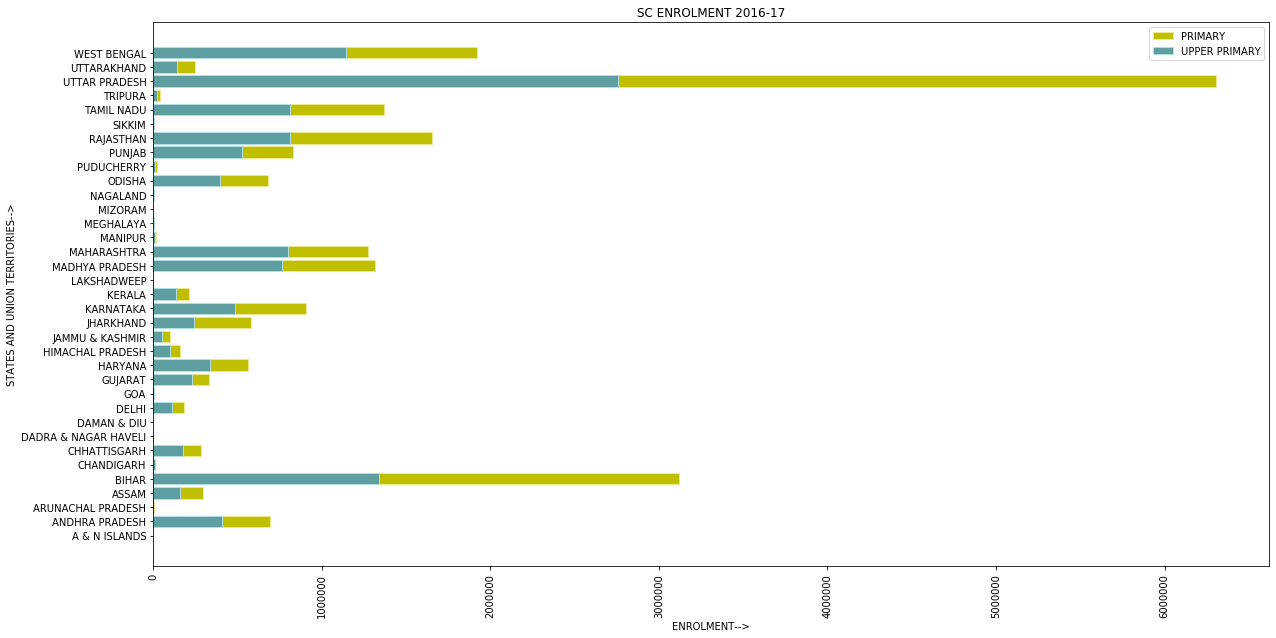

C:\Users\ritik\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


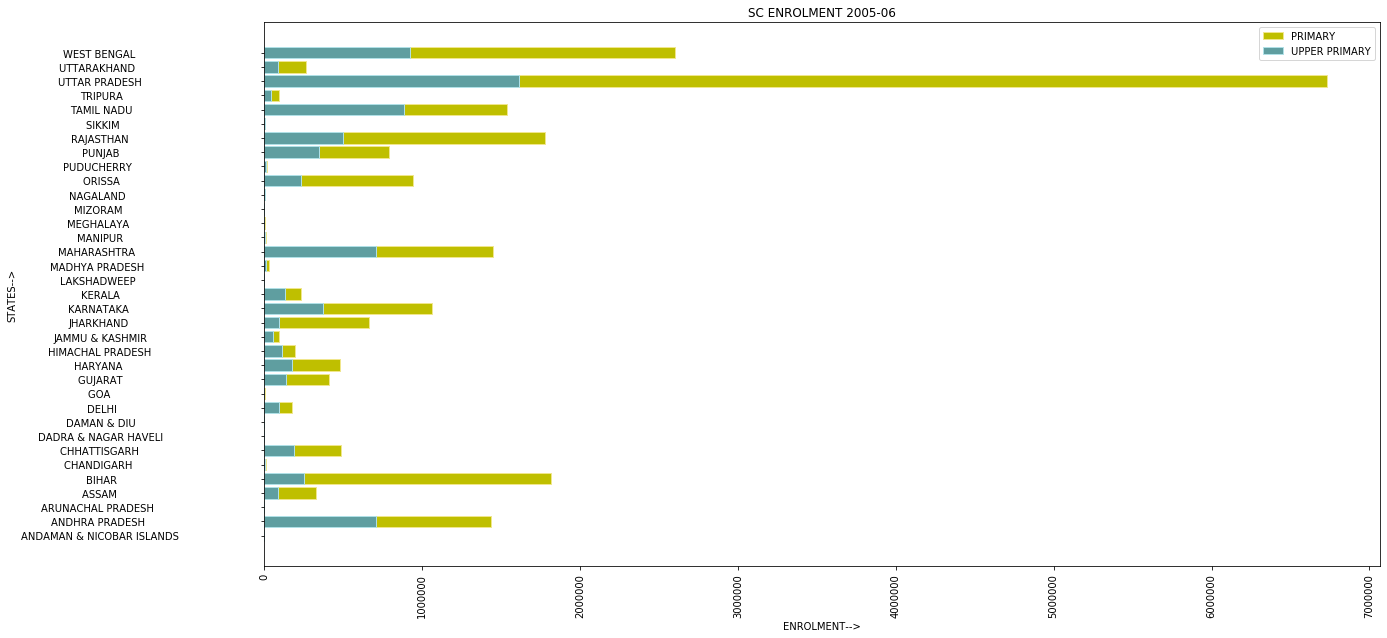

In [49]:
plt.figure(figsize=(20,10))
schools=[state for state, df2 in df2.groupby('STATE')]
plt.barh(schools,result2['SC ENROLMENT- PRIMARY'],color='y',  edgecolor='khaki',label='PRIMARY')
plt.barh(schools,result2['SC ENROLMENT- UPPER PRIMARY'],color='cadetblue',  edgecolor='powderblue',label='UPPER PRIMARY')
plt.xticks(rotation=90)   
plt.title("SC ENROLMENT 2016-17")
plt.xlabel('ENROLMENT-->')
plt.ylabel('STATES AND UNION TERRITORIES-->')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
schools=[state for state, df1 in df1.groupby('STATE')]
plt.barh(schools,result1['SC ENROLMENT PRIMARY'],color='Y',  edgecolor='KHAKI',label='PRIMARY')
plt.barh(schools,result1['SC ENROLMENT UPPER PRIMARY'],color='CADETBLUE',  edgecolor='POWDERBLUE',label='UPPER PRIMARY')
plt.xticks(rotation=90)   
plt.title("SC ENROLMENT 2005-06")
plt.xlabel('ENROLMENT-->')
plt.ylabel('STATES-->')
plt.legend()
plt.show()


### PRIMARY ENROLMENT

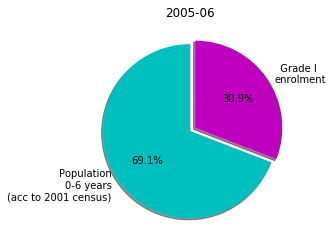

In [61]:
import matplotlib.pyplot as plt
df = pd.read_csv (r'C:\Users\ritik\OneDrive\Desktop\COMPUTING\2005-06.csv')
nan_df = df[df.isna().any(axis=1)]
nan_df.head()
df = df.dropna()
D =[df['Population'].sum(),df['Primaryy'].sum()]
la = ['Population\n0-6 years\n(acc to 2001 census)','  Grade I \nenrolment']
col = ['c','m']
plt.pie(D,labels=la,colors=col,startangle=90,shadow= True,explode=(0,0.07),autopct='%1.1f%%')
plt.title('2005-06')
plt.show()

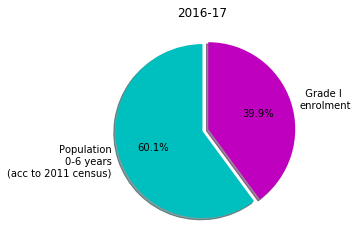

In [60]:
import matplotlib.pyplot as plt
df = pd.read_csv (r'C:\Users\ritik\OneDrive\Desktop\COMPUTING\2016-17.csv')
nan_df = df[df.isna().any(axis=1)]
nan_df.head()
df = df.dropna()
D =[df['Population'].sum(),df['Primaryy'].sum()]
la = ['Population\n0-6 years\n(acc to 2011 census)','  Grade I \nenrolment']
col = ['c','m']
plt.pie(D,labels=la,colors=col,startangle=90,shadow= True,explode=(0,0.07),autopct='%1.1f%%')
plt.title('2016-17')
plt.show()

### HYPOTHESIS TESTING 

#### FEMALE TEACHERS ENROLMENT

According to a statement made by https://gpseducation.oecd.org/CountryProfile?primaryCountry=IND&treshold=10&topic=EO,
            "The share of women among teaching staff in primary education is one of the smallest among OECD and partner countries with available data. (51.2 %, rank 40/40 , 2017)"
Primary education here refers to schooling.
In order for this statement to be evaluated Hypothesis testing is done.

#### ONE SAMPLED T-TEST

    Population:            All districts

    Parameter of Interest: p (proportion)

    Null Hypothesis:       p = 51.2

In [53]:
t = df2['% FEMALE TEACHERS']
t_mean = np.mean(t)
print("MEAN VALUE:\t",t_mean)
tset, pval = ttest_1samp(t, 51.2)
print('p VALUE:\t',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("\n\tWe are rejecting Null Hypothesis\nAs the p value is very small as compared to 0.05\nWe have strong evidence in support for the Alternative Hypothesis")
else:
  print("We are accepting Null Hypothesis ")


MEAN VALUE:	 46.983606826987184
p VALUE:	 5.41070104886563e-11

	We are rejecting Null Hypothesis
As the p value is very small as compared to 0.05
We have strong evidence in support for the Alternative Hypothesis


#### PRESCHOOL EDUCATION

According to a statement made by 
https://wenr.wes.org/2018/09/educationinindia#:~:text=As%20of%20now%2C%20most%20children,in%202016%2C%20according%20to%20UNESCO.,
            "Preschool education is not mandatory and is still uncommon in India—only 9.7 percent of pupils attended preschool classes in 2016/17, despite UNICEF’s description of ICDS as the largest early childhood education program in the world."

In order for this statement to be evaluated Hypothesis testing is done.

#### ONE SAMPLED T-TEST

    Population:               All districts

    Parameter of Interest:    p (percentage)

    Null Hypothesis:          p = 9.7
    
    Alternative Hypothesis:   p > 9.7 (note that this is a one-sided test)

In [54]:
t = df2['PRE-PRIMARY SCHOOLS %']
t_mean = np.mean(t)
print("MEAN VALUE:\t",t_mean,'%')
tset, pval = ttest_1samp(t, 9.7)
print('p VALUE:\t',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("\n\tWe are rejecting Null Hypothesis\nAs the p value is very small as compared to 0.05\nWe have strong evidence in support for the Alternative Hypothesis")
else:
  print("We are accepting Null Hypothesis ")


MEAN VALUE:	 23.889291085282057 %
p VALUE:	 6.667095331140824e-42

	We are rejecting Null Hypothesis
As the p value is very small as compared to 0.05
We have strong evidence in support for the Alternative Hypothesis


#### PRIVATE SCHOOL ENROLMENT

According to a statement made by 
https://www.hindustantimes.com/education/in-5-years-private-schools-gain-17-million-students-government-schools-lose-13-million/story-6FV1ic7RLttmWc0ZkhBQBM.html,
"In 2016, for the first time in 10 years, private-school enrolment did not increase in rural areas–it fell from 30.8% in 2014 to 30.5% in 2016, according to the ASER 2016 report."
In order for this statement to be evaluated Hypothesis testing is done.

#### ONE SAMPLED T-TEST

    Population:               All districts

    Parameter of Interest:    p (percentage)

    Null Hypothesis:          p = 30.5
    


In [73]:
t = df['% PRIVATE ENROLMENT']
t_mean = np.mean(t)
print("MEAN VALUE:\t",t_mean,'%')
tset, pval = ttest_1samp(t, 30.5)
print('p VALUE:\t',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("\n\tWe are rejecting Null Hypothesis\nAs the p value is very small as compared to 0.05\nWe have strong evidence in support for the Alternative Hypothesis")
else:
  print("We are accepting Null Hypothesis ")


MEAN VALUE:	 33.731107246772545 %
p VALUE:	 0.00039256850808567714

	We are rejecting Null Hypothesis
As the p value is very small as compared to 0.05
We have strong evidence in support for the Alternative Hypothesis


## CONCLUSION FROM OUR ANALYSIS



* Total schools has increased in the last 10 years with increase in population.
* Girls only school exist more in the country than Boys only.
* Even today, there are numerous schools in India lacking basic amenities like PLAYGROUND,ELECTRICITY,COMPUTER,etc and hence are not able to increase educational quality like other countries.
* With that said there can be seen improvements from the past years as well, so we are heading in the right direction to improve educational quality.
* Classrooms have become proportionate to the schools from 2005-06 to 2016-17.
* It is also found that area in sq. km of districts is not almost proportionate to the no. of schools present there due to many external factors.
* Literacy rate and Pupil-Teacher Ratio has significantly increased.Thus, we are heading in the right direction to become a well-educated society.
* Single teacher schools prevalent in the earlier years has considerably reduced.
* SC and ST enrolment have greatly increased but there has been significantly higher dropout rates after primary education.
* Students enrolling for early years of education has fairly increased by 10%.
* With the help of HYPOTHESIS TESTING, various statements made about SCHOOLING IN INDIA were checked and proved as well.
 